[[1, 2, 3, 8, 12, 13, 17], [0, 2, 4, 5, 10, 12, 13, 14, 17, 18], [0, 1, 3, 8, 10, 12, 14, 15, 19, 38], [0, 2, 4, 7, 8, 9, 10, 12, 14, 17, 18, 19], [1, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15, 18], [1, 4, 6, 7, 11, 12, 13, 15, 16, 17, 18, 19], [4, 5, 8, 10, 11, 14, 18, 19], [3, 4, 5, 8, 10, 12, 13, 15, 17, 18, 27], [0, 2, 3, 6, 7, 15, 16, 18, 19, 33], [3, 4, 11, 12, 13, 14, 16], [1, 2, 3, 4, 6, 7, 12, 13, 15, 16], [5, 6, 9, 12, 15, 18, 19], [0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 19], [0, 1, 4, 5, 7, 9, 10, 12, 14, 15, 18, 19], [1, 2, 3, 4, 6, 9, 13, 16, 17, 18, 19], [2, 4, 5, 7, 8, 10, 11, 13, 17, 18], [5, 8, 9, 10, 14], [0, 1, 3, 5, 7, 14, 15, 18, 22], [1, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 17, 19], [2, 3, 5, 6, 8, 11, 12, 13, 14, 18, 33], [21, 27, 28, 29, 32, 33, 34, 35, 36, 37, 39], [20, 23, 26, 28, 30, 31, 32, 34, 35, 38, 39], [17, 23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 37], [21, 22, 24, 25, 27, 32, 33, 34, 35, 37, 38], [22, 23, 25, 27, 31, 33, 34, 37, 39], [22, 23, 24, 27, 29, 30, 31, 

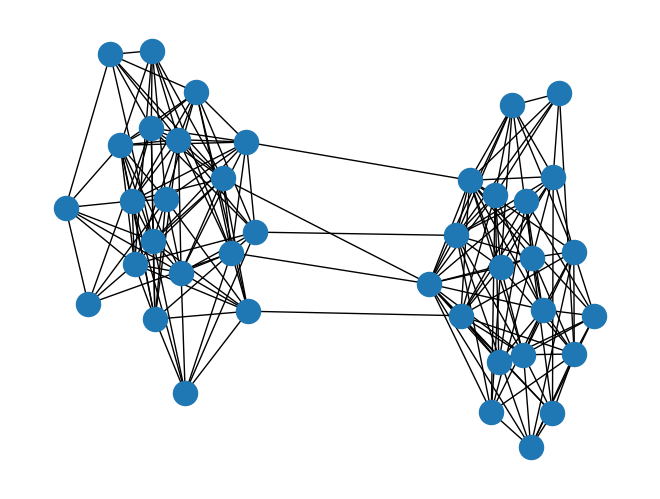

In [89]:
#WITH CHARLIE AND ERIC

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

P_same=0.5
P_other = 0.02
nodes_per_group = 20
groups = 2


G = nx.stochastic_block_model([nodes_per_group] * groups, [[P_same if i == j else P_other for i in range(groups)] for j in range(groups)])
pos = nx.spring_layout(G)
nx.draw(G, pos=pos)

adjacency = [list(item[1].keys()) for item in G.adjacency()]
print(adjacency)


In [90]:


class Node:
    def __init__(self, neighbors, families, alpha = 0.7, beta = 1):
        self.neighbors = neighbors
        self.pheromones = np.zeros((families))
        self.alpha = alpha
        self.beta = beta

    def getAttractiveness(self, family): 
        return self.pheromones[family]**0.8 + self.beta
        
    def decay(self):
      self.pheromones = [self.alpha * p for p in self.pheromones]

In [91]:
class Ant:
    def __init__(self, family, startNode, allNodes):
        self.family = family
        self.currentNode = startNode
        self.allNodes = allNodes

    def getNextNode(self, neighbors: list):
        likelihoods = [self.allNodes[i].getAttractiveness(self.family) for i in neighbors]
        probabilities = np.array(likelihoods) / sum(likelihoods)
        nextNode = np.random.choice(neighbors, p=probabilities)

        self.currentNode = nextNode
        return nextNode

    def updateNode(self):
        self.allNodes[self.currentNode].pheromones[self.family] += 1

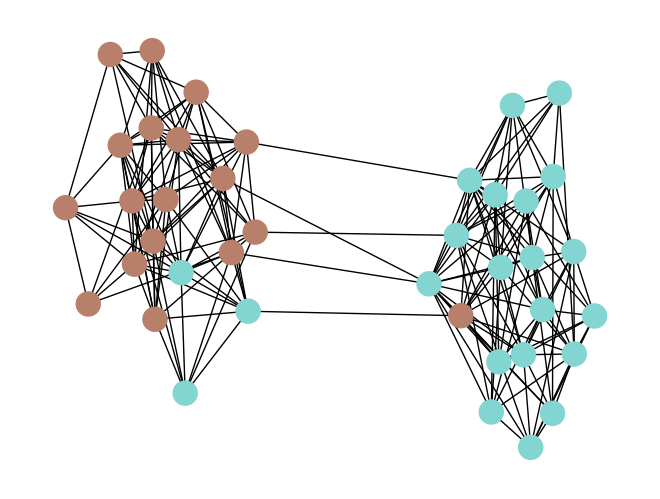

In [92]:
ant_per_group = 60
n = 10000

nodes = [Node(neighbors=adjacency[i], families=groups, alpha=0.9, beta=0.4) for i in range(nodes_per_group * groups)]
ants = []
for group in range(groups):
    ants += ([Ant(group, np.random.randint(groups * nodes_per_group), nodes)] * ant_per_group)

for i in range(n):
    for ant in ants:
        ant.getNextNode(nodes[ant.currentNode].neighbors)
    for ant in ants:
        ant.updateNode()
    for node in nodes:
        node.decay()

colors = np.random.rand(groups, 3)
node_colors = [colors[np.argmax(i.pheromones)] for i in nodes]

nx.draw(G, pos=pos, node_color = node_colors)